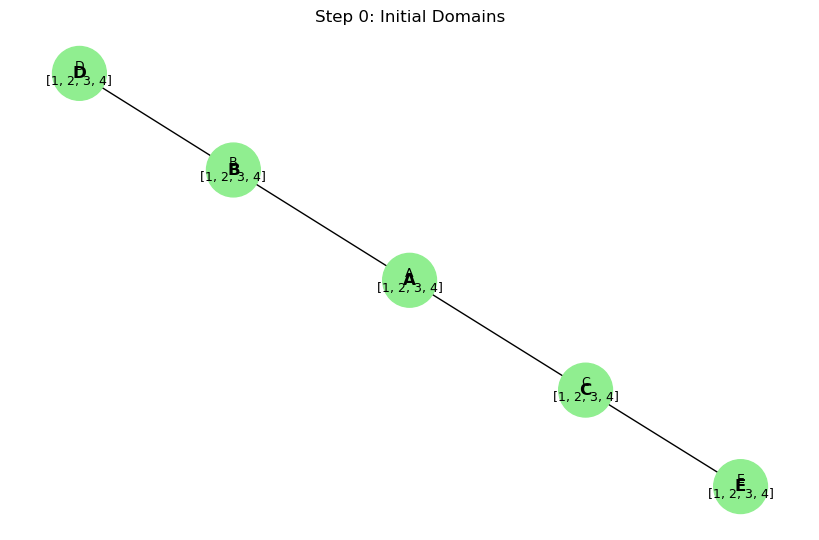

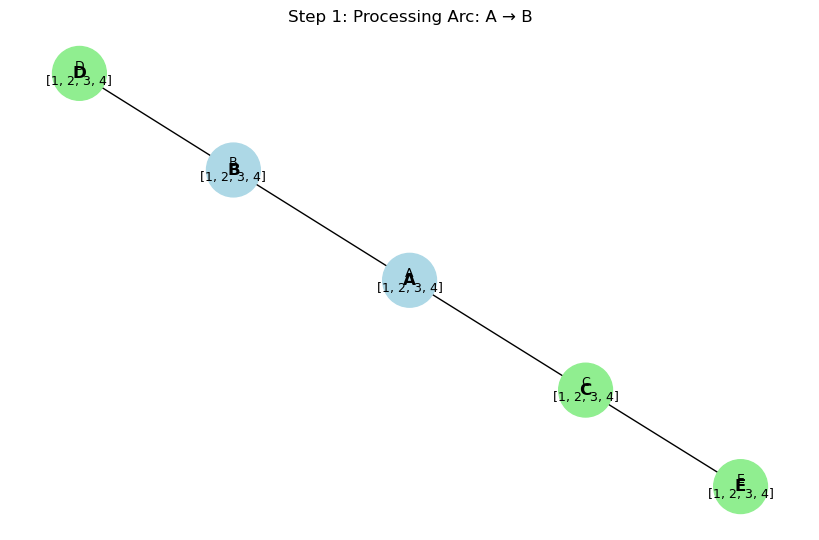

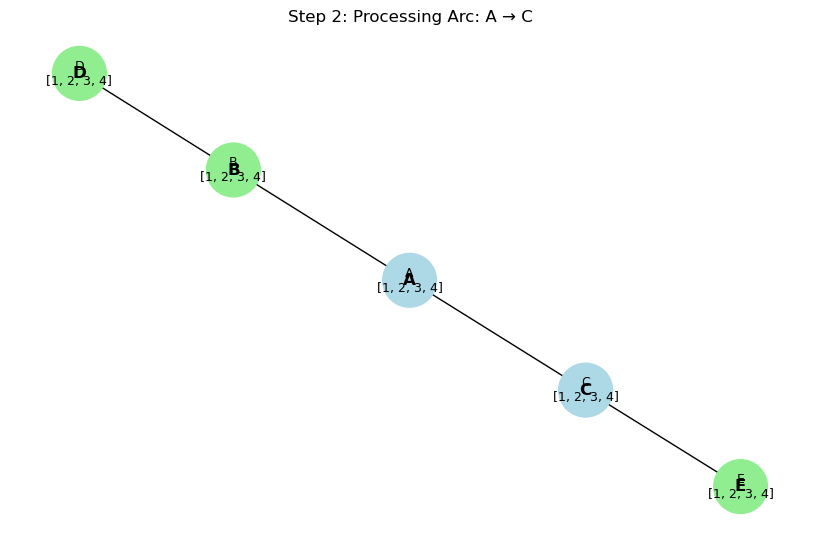

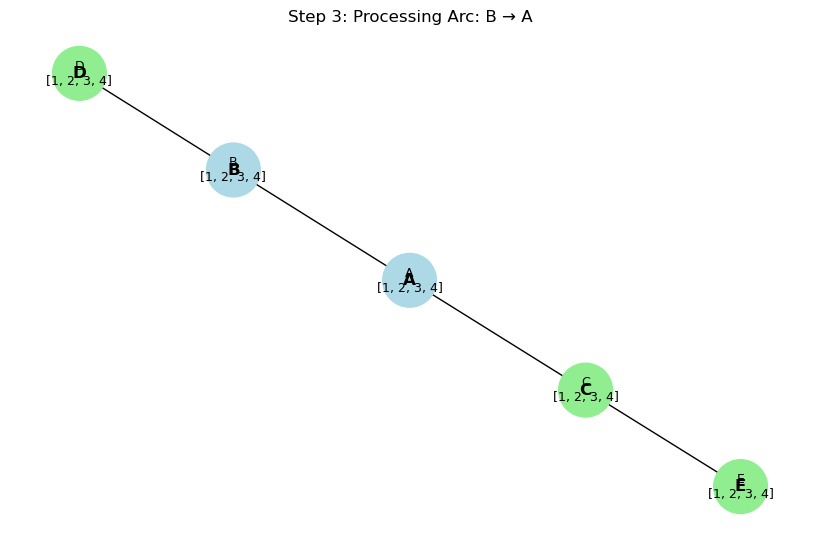

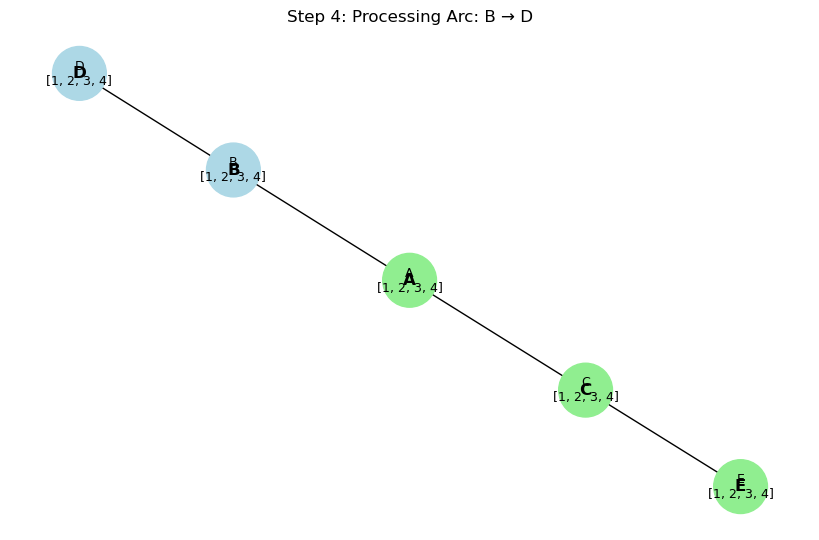

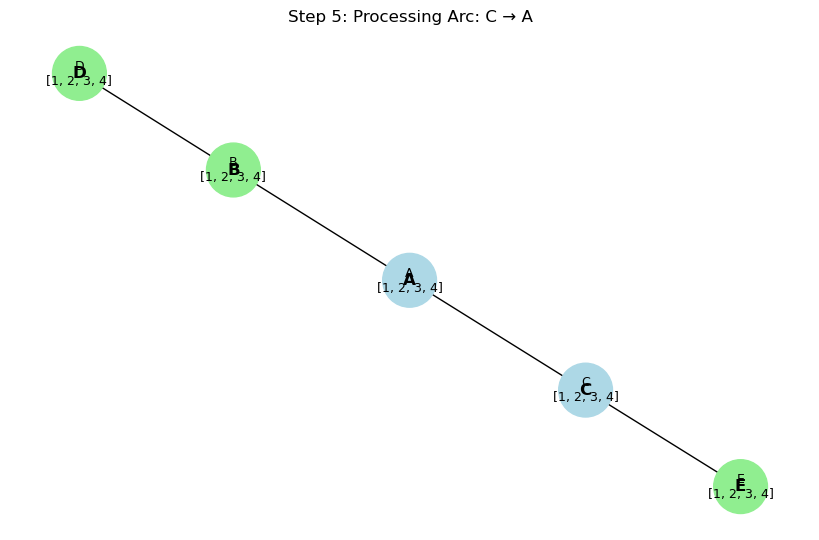

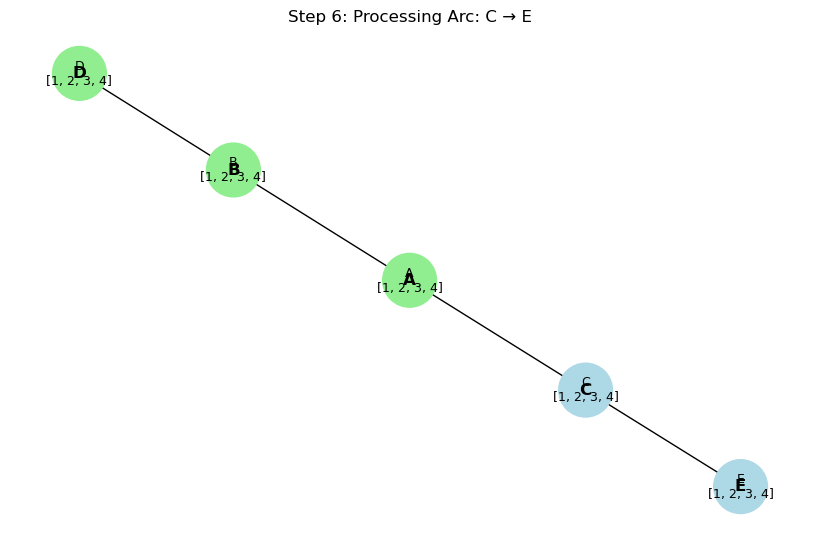

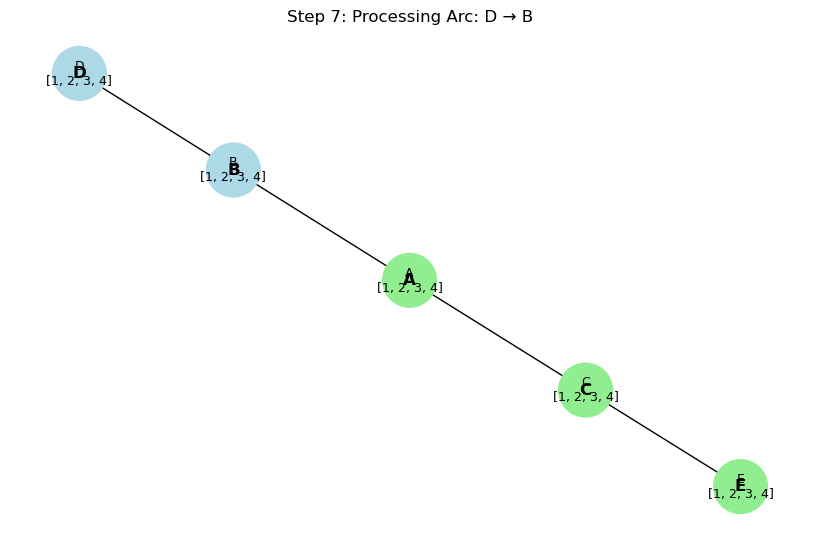

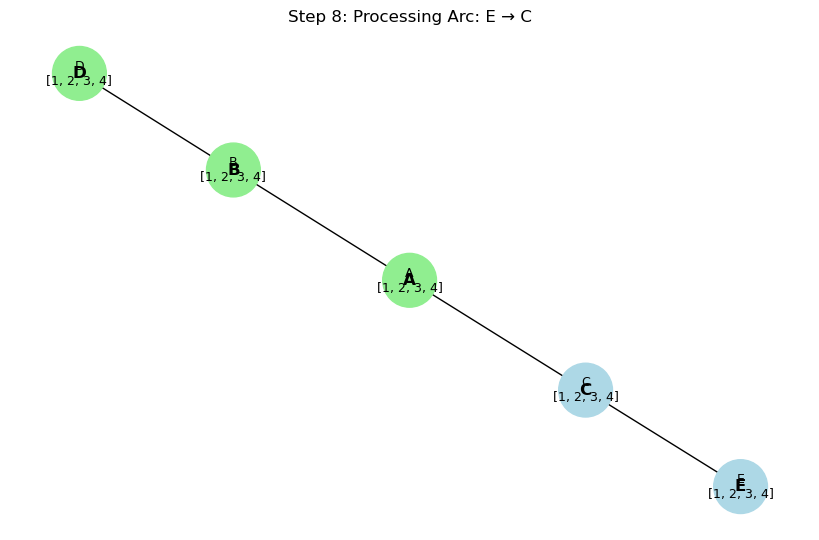

✅ Arc Consistency achieved.
✔️ Solution found:
  A = 1
  B = 2
  C = 2
  D = 1
  E = 1


In [5]:
import matplotlib.pyplot as plt
import networkx as nx
import time
from collections import deque

# Variables and their domains
variables = ['A', 'B', 'C', 'D', 'E']
domains = {var: [1, 2, 3, 4] for var in variables}  # Values 1-4 for each variable

# Tree structure of constraints (neighbors)
neighbors = {
    'A': ['B', 'C'],
    'B': ['A', 'D'],
    'C': ['A', 'E'],
    'D': ['B'],
    'E': ['C']
}

# Visualization function
def draw_tree_structure(domains, arc=None, step=0):
    G = nx.Graph()
    for var, nbrs in neighbors.items():
        for n in nbrs:
            G.add_edge(var, n)

    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(8, 5))
    
    node_labels = {var: f"{var}\n{domains[var]}" for var in G.nodes}
    node_colors = ['lightblue' if arc and var in arc else 'lightgreen' for var in G.nodes]

    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=1500, font_weight='bold')
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=9, font_color='black')

    if arc:
        label = f"Processing Arc: {arc[0]} → {arc[1]}"
        plt.title(f"Step {step}: {label}")
    else:
        plt.title(f"Step {step}: Initial Domains")

    plt.show()
    time.sleep(0.5)

# AC-3 Algorithm to enforce Arc Consistency
def ac3(domains):
    queue = deque([(xi, xj) for xi in variables for xj in neighbors[xi]])
    step = 0
    draw_tree_structure(domains.copy(), step=step)  # Initial visualization

    while queue:
        xi, xj = queue.popleft()
        step += 1
        if revise(domains, xi, xj):
            if not domains[xi]:  # If a domain is emptied, there's no solution
                print(f"❌ No solution possible for {xi}.")
                return False
            for xk in neighbors[xi]:
                if xk != xj:
                    queue.append((xk, xi))
        draw_tree_structure(domains.copy(), (xi, xj), step)

    print("✅ Arc Consistency achieved.")
    return True

# Revise function to prune values from domains based on constraints
def revise(domains, xi, xj):
    revised = False
    for x in domains[xi][:]:  # Copy to safely iterate
        if not any(x != y for y in domains[xj]):
            domains[xi].remove(x)
            revised = True
    return revised

# Backtracking function to find a solution
def backtrack(domains, assignment):
    if len(assignment) == len(variables):
        return assignment  # Solution found

    # Select unassigned variable (simple heuristic: choose first unassigned)
    unassigned = [v for v in variables if v not in assignment]
    var = unassigned[0]

    for value in domains[var]:
        if is_consistent(assignment, var, value):
            assignment[var] = value
            result = backtrack(domains, assignment)
            if result:
                return result
            del assignment[var]  # Backtrack
    return None

# Check if the current value assignment is consistent with neighbors
def is_consistent(assignment, var, value):
    for neighbor in neighbors[var]:
        if neighbor in assignment and assignment[neighbor] == value:
            return False
    return True

# Solve the tree-structured CSP using AC-3 and Backtracking
def solve_tree_csp():
    domains_copy = {k: v[:] for k, v in domains.items()}  # Make a copy of the domains
    if not ac3(domains_copy):
        print("❌ No solution due to inconsistent constraints.")
        return None

    assignment = {}
    solution = backtrack(domains_copy, assignment)
    if solution:
        print("✔️ Solution found:")
        for var, value in solution.items():
            print(f"  {var} = {value}")
    else:
        print("❌ No solution found.")

# Solve the problem
solve_tree_csp()
